# Eigenvalues and diagonalization

Let $A$ be a symmetric matrix. According to the [real spectral theorem](https://opentext.uleth.ca/Math3410/subsec-ortho-diag.html#thm-real-spectral), there exists an orthogonal matrix $P$ such that $P^TAP$ is diagonal, with the entries on the main diagonal given by the eigenvalues of $A$.

In this worksheet, we will work through the process of finding the eigenvalues of a symmetric matrix, along with the orthogonal matrix $P$.

We will also look at the method described in [Section 4.6](https://opentext.uleth.ca/Math3410/section-matrix-factor.html#pars-power-method) for finding dominant eigenvalues.

## Orthogonal diagonalization

Consider the following $5\times 5$ matrix $A$:

$$A = \begin{bmatrix}97&-23&-23&-3&-46\\-23&49&1&21&2\\-23&1&49&21&2\\-3&21&21&9&42\\-46&2&2&42&52\end{bmatrix}$$

First, let's enter the matrix and confirm that it's symmetric. You can compute the transpose of a SymPy matrix `A` using `A.T`.

In [1]:
from sympy import Matrix, init_printing
init_printing()

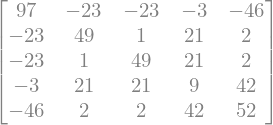

In [2]:
A = Matrix(5, 5, [97, -23, -23, -3, -46, -23, 49, 1, 21, 2, -23, 1, 49, 21, 2, -3, 21, 21, 9, 42, -46, 2, 2, 42, 52])
A.T

Now, let's find the eigenvalues of $A$. Yes, there's a way to jump straight to the answer, but let's go through the steps anyway. First, compute the characteristic polynomial of $A$. You may wish to refer to the [appendix on SymPy](https://opentext.uleth.ca/Math3410/sec-sympy.html#subsec-sympy-matrix-20) in the textbook for details on the correct syntax to use.

In [3]:
char_A = A.charpoly().as_expr()
char_A

Now, factor the polynomial:

In [4]:
char_A.factor()

Finally, based on the result above, input the eigenvalues into the cell below:

In [5]:
L1 = 144 # lambda 1
L2 = 48 # lambda 2 with mulltiplicity 3
L3 = -32 # lambda 3

Now, recall that the if $\vec{v}$ is an eigenvector of $A$ corresponding to the eigenvalue $\lambda$, then $\vec{v}$ belongs to the nullspace of $\lambda I - A$, where $I$ is the identity matrix. You can create an $n\times n$ identity matrix in SymPy using the syntax `eye(n)`.

For each eigenvalue $\lambda$ found above, compute the nullspace of $\lambda I-A$. You will want to refer to these nullspaces later, so give each one a name. For example, if your first eigenvalue was 7, you could enter something like 
```
E1 = (7*eye(5)-A).nullspace()
E1
```
to get the first eigenspace. Three code cells are provided below; if you need more, click on the $+$ button in the toolbar.

In [6]:
from sympy import eye

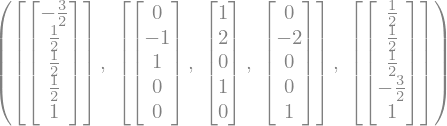

In [7]:
# find eigenspace corresponding to L1, L2, and L3 
E1 = (L1*eye(5)-A).nullspace()
E2 = (L2*eye(5)-A).nullspace()
E3 = (L3*eye(5)-A).nullspace()
E1, E2, E3

Now, let's check our work. Use the command `A.eigenvects()` to compute the eigenvectors and eigenvalues in one step, and confirm that the results match what you found above.

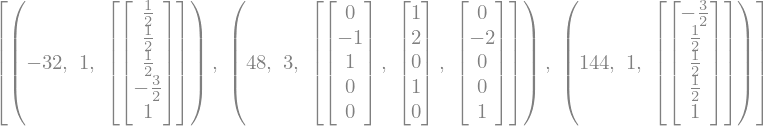

In [8]:
B = A.eigenvects()
B

Next, we want to diagonalize $A$. There is a `diagonalize` command, but it won't do *orthogonal* diagonalization, which is what we want.

Recall that the eigenvectors corresponding to *distinct* eigenvalues are automatically orthogonal. But this is not true of *repeated* eigenvalues, and there's a good chance you've found that one of your eigenvalues has multiplicity greater than 1.

A matrix $P$ is orthogonal if $P^TP=I$, in which case the columns of $P$ form an *orthonormal* basis. (So we are looking for an orthonormal basis of eigenvectors.)

For any 1-dimensional eigenspaces, you will just need to find a unit eigenvector. For example, if $\vec{v}=(2,1,0,3,1)$ is an eigenvector for an eigenvalue of multiplicity 1, then you will want to use the eigenvector $\vec{u} = \frac{1}{\sqrt{15}}(2,1,0,3,1)$, since $\lVert \vec{v}\rVert = \sqrt{15}$.

For any higher-dimensional eigenspaces, you can use the Gram-Schmidt algorithm. Recall that the optional argument `true` will produce unit vectors: given a basis `B` for an eigenspace, the command `GramSchmidt(B,true)` will produce an orthonormal basis.

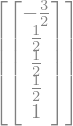

In [9]:
from sympy import GramSchmidt, sqrt
E1

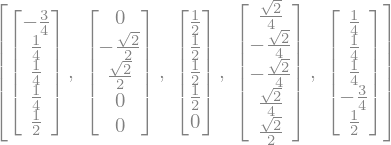

In [10]:
# GramSchmidt for finding orthonormal basis
# create list of vectors to input in GramSchmidt argument
basis = [E1[0], E2[0], E2[1], E2[2], E3[0]]
gs = GramSchmidt(basis, True)
gs

Once you have found five orthonormal eigenvectors, create a matrix $P$ whose columns are those eigenvectors:

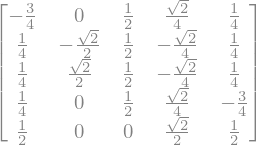

In [11]:
# create P
P_list = []
for vectors in gs:
    P_list.append(vectors)

P = Matrix([P_list])
P

Confirm that your matrix is orthogonal by computing $PP^T$. You should get the identity matrix as a result.

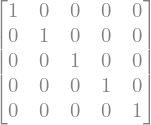

In [12]:
P*(P.T)

Finally, compute the matrix $P^TAP$, and confirm that the result is a diagonal matrix whose entries are the eigenvalues of $A$.

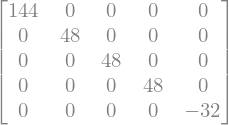

In [13]:
P.T*A*P

## The power method for dominant eigenvalues

For the problem you just completed, you may have noticed that there was one eigenvalue that was larger in absolute value than all the other eigenvalues. Such an eigenvalue is called a **dominant eigenvalue**.

If you complete the [worksheet on linear dynamical systems](https://opentext.uleth.ca/Math3410/worksheet-dynamical.html), you will see that the state of such systems is ultimately given by a sum of certain geometric series (involving eigenvalues of a matrix), and that the long-term behaviour of the system is approximately geometric, and governed by the dominant eigenvalue.

The power method states that, given an initial state vector $\vec{x}_0$, the sequence of vectors
$$\vec{x}_0,A\vec{x}_0,A^2\vec{x}_0,\ldots, A^k\vec{x}_0,\ldots$$
will converge to an eigenvector for the dominant eigenvalue.

Let's see if this is true. Below, you are given an initial guess `x0` and an empty list `L`. You want to populate `L` with vectors of the form $A^k\vec{x}_0$, for $0\leq k\leq 10$. This is most easily done using a `for` loop. For details on syntax, see the [example in the textbook](https://opentext.uleth.ca/Math3410/section-matrix-factor.html#pars-power-method).

In [14]:
# Look after this to find the correct version
x0 = Matrix([1,0,1,0,1])
L = list()
k = 10
for i in range(k):
    L.append((A**k)*x0)

Let's print the last vector in the list, which will probably have some pretty big entries:

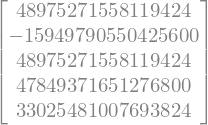

In [15]:
L[9]

Now let's check our work.

How can we tell if this vector is (approximately) a multiple of the dominant eigenvector? One option is to divide each entry in `L[10]` by the smallest (in absolute value) non-zero entry in `L[10]`. How does this compare to the eigenvector you originally found for the dominant eigenvalue?

If you find that some entries look right, but not others, see the end of the worksheet.

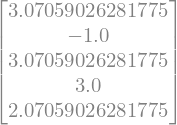

In [16]:
L[9]/(- L[9][1]).evalf() 

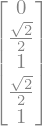

In [17]:
C = (P**(-1)) * x0
C

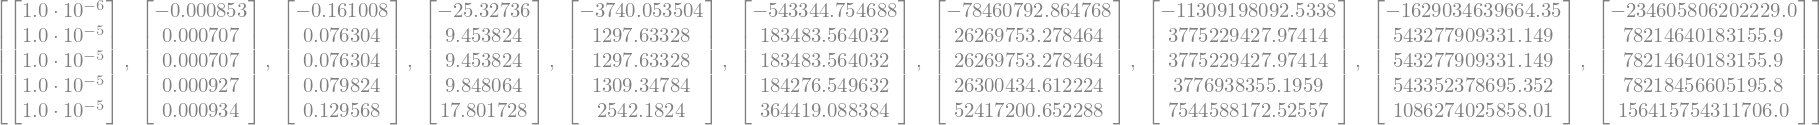

In [18]:
# The correct version
x1 = Matrix([0.000001, 0.00001, 0.00001, 0.000010, 0.00001])
L1 = list()
for i in range(k):
    L1.append(A**i*x1)

L1

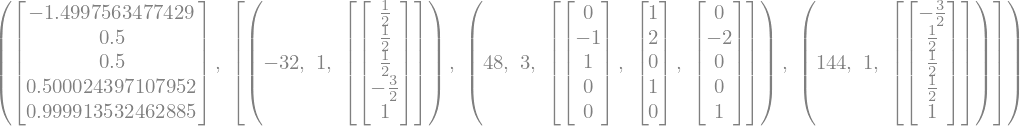

In [23]:
-L1[9]/(-L1[9][1])/2, B

Finally, suppose we didn't know what the dominant eigenvalue was, and we wanted to find it.

Note that if $\vec{x}$ is a dominant eigenvector, then $A\vec{x} = \lambda\vec{x}$, where $\lambda$ is the dominant eigenvalue. Then

$$\lambda = \frac{\vec{x}\cdot (\lambda\vec{x})}{\vec{x}\cdot \vec{x}} = \frac{\vec{x}\cdot A\vec{x}}{\vec{x}\cdot \vec{x}}.$$

It seems reasonable, then, that if $\vec{x}_k$ is *approximately* equal to a dominant eigenvector, then the numbers

$$r_k = \frac{\vec{x}x_k\cdot A\vec{x}_k}{\vec{x}_k\cdot \vec{x}_k}=\frac{\vec{x}_k\cdot \vec{x}_{k+1}}{\lVert \vec{x}_k\rVert^2}$$

should be approximately equal to the dominant eigenvalue. (These numbers are the so-called *Rayliegh quotients*.)

Following the approach [given in the textbook](https://opentext.uleth.ca/Math3410/section-matrix-factor.html#pars-power-method-10), compute the Rayleigh quotients $r_k$ for $1\leq k\leq 10$, and comment on how well they approximate the dominant eigenvalue of $A$.

In [19]:
# Computing the Rayliegh quotients
M = list()
for k in range(9):
    M.append((L1[k].dot(L1[k+1]))/(L1[k].dot(L1[k])))

M

In [20]:
(M[8]/144)*100

(Because we are physicists) We found the percentage difference to find the relative value how well the rayleigh quotients compute the dominant eigenvalue, which was found to be 99.999997135115%, which is a good approximation [I think? Maybe? :)]

Does it look like the numbers are approaching the dominant eigenvalue? Or do they seem to be getting near one of the other eigenvalues?

If your numbers seem wrong, it might be for the following reason: when we write our initial guess `x0` as a linear combination of the eigenvectors, the coefficient of the dominant eigenvector has to be nonzero. Is that the case here? To check, note that if $\vec{c}$ is the vector of coefficients, then we must have $P\vec{c}=\vec{x}_0$. Can you solve this equation for $\vec{c}$?

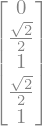

In [21]:
c = (P**(-1))*x0
c

If the first entry in `c` is zero, enter a new value for `x0`, and try the above steps again.